# Import base requirement

In [2]:
import nltk

In [3]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [5]:
import json
import pickle

In [70]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

# Get started

## Preprocess steps

In [41]:
# Initial lists
words = []
classes = []
documents = []
ignore_words = ['?', '!', '@', '$']

In [42]:
# Use json
with open('intents.json', 'r', encoding='utf-8') as data_file:
    data_file = data_file.read()
    intents = json.loads(data_file)

In [43]:
intents

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi there',
    'How are you',
    'Is anyone there?',
    'Hey',
    'Hola',
    'Hello',
    'Good day'],
   'responses': ['Hello, thanks for asking',
    'Good to see you again',
    'Hi there, how can I help?'],
   'context': ['']},
  {'tag': 'goodbye',
   'patterns': ['Bye',
    'See you later',
    'Goodbye',
    'Nice chatting to you, bye',
    'Till next time'],
   'responses': ['See you!', 'Have a nice day', 'Bye! Come back again soon.'],
   'context': ['']},
  {'tag': 'thanks',
   'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    'Awesome, thanks',
    'Thanks for helping me'],
   'responses': ['Happy to help!', 'Any time!', 'My pleasure'],
   'context': ['']},
  {'tag': 'noanswer',
   'patterns': [],
   'responses': ["Sorry, can't understand you",
    'Please give me more info',
    'Not sure I understand'],
   'context': ['']},
  {'tag': 'options',
   'patterns': ['How you could help me?',
    'What you can do

In [44]:
# View data
print(len(intents['intents']), end='\n')

for i in [random.randint(1, 100) for _ in range(5)]:
    print(intents['intents'][i])
    print()

304
{'tag': 'clustering methods', 'patterns': ['what are clustering methods', 'what are the uses of clustering methods', 'how clustering methods are used'], 'responses': ['Clustering methods are used to identify groups of similar objects in a multivariate data sets collected from fields such as marketing, bio-medical and geo-spatial.'], 'context': ['']}

{'tag': 'Algorithm techniques in Machine Learning', 'patterns': ['different algorithms techniques of Machine Learning', 'algorithms techniques of Machine Learning', 'list some algorithms techniques of Machine Learning'], 'responses': ['Supervised Learning,Unsupervised Learning,Semi-supervised Learning,Reinforcement Learning,Transduction,Learning to Learn'], 'context': ['']}

{'tag': 'Neural_Network', 'patterns': ['What is a neural network?', 'neural network', 'define neural network'], 'responses': ['A neural  network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that m

In [45]:
# Populating the lists
for intent in intents['intents']:
    for pattern in intent['patterns']:
        
        # Take each word and tokenize it
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        
        # Adding document
        documents.append((w, intent['tag']))
        
        # Adding classes to our class list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [46]:
words[-10:]

['characteristics',
 'that',
 'can',
 'be',
 'considered',
 'as',
 'advanatges',
 'of',
 'knn',
 'algorithm']

In [47]:
documents[-5:]

[(['what',
   'can',
   'be',
   'the',
   'possible',
   'reasons',
   'for',
   'not',
   'using',
   'k-means',
   'algorithm'],
  'disadvantges of using k-means'),
 (['what', 'are', 'the', 'advanatges', 'of', 'knn', 'algorithm'],
  'advantages of knn algorithm'),
 (['mention', 'some', 'of', 'the', 'advanatges', 'of', 'knn', 'algorithm'],
  'advantages of knn algorithm'),
 (['what', 'are', 'the', 'benefits', 'of', 'using', 'knn', 'algorithm'],
  'advantages of knn algorithm'),
 (['what',
   'are',
   'some',
   'of',
   'the',
   'characteristics',
   'that',
   'can',
   'be',
   'considered',
   'as',
   'advanatges',
   'of',
   'knn',
   'algorithm'],
  'advantages of knn algorithm')]

In [48]:
classes[-10:]

['hierarchical clustering based method',
 'partitioning clustering method',
 'grid-based clsutering methods',
 'use of KNN algorithm',
 'working of knn algorithm',
 'disadvantages of knn algorithm',
 'working of k-means algorithm',
 'advantages of k-means algorithm',
 'disadvantges of using k-means',
 'advantages of knn algorithm']

In [49]:
# Lemmatize words
words_lemma = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words_lemma[-10:]

['characteristic',
 'that',
 'can',
 'be',
 'considered',
 'a',
 'advanatges',
 'of',
 'knn',
 'algorithm']

In [54]:
words_lemma = sorted(list(set(words_lemma)))
classes = sorted(list(set(classes)))

In [56]:
print(len(words_lemma), "Unique lemmatized words")
print(len(classes), "Class")
print(len(documents), "Documents")

642 Unique lemmatized words
255 Class
910 Documents


In [58]:
pwd

'C:\\Users\\Lenovo\\learning\\CHATBOT\\firstChatbotself'

In [60]:
pickle.dump(words_lemma, open('words_lemma.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))
pickle.dump(documents, open('documents.pkl', 'wb'))

## Initializing trainning data

In [65]:
training = []
output_empty = [0] * len(classes)

for doc in documents:
    # Initializing bag of words
    bag = []
    # Getting tokenize words of each doc
    pattern_words = doc[0]
    # Lemmatize each word
    pattern_words_lemma = [lemmatizer.lemmatize(w.lower()) for w in pattern_words]
    
    # Create bag of words array with 1, if word match found in current pattern
    for w in words_lemma:
        bag.append(1) if w in pattern_words_lemma else bag.append(0)
        
    # Output is a '0' for each tag and '1' for currrent tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])

In [71]:
# Shuffle features and turn into np.array
random.shuffle(training)
training = np.array(training)

# Split to train test set
train_X = list(training[:, 0])
train_y = list(training[:, 1])
print('Training data created')

Training data created


C:\Users\Lenovo\anaconda3\envs\chatbot\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


## Build model

In [75]:
model = Sequential()

# Input layer
model.add(Dense(256, input_shape=(len(train_X[0]),)))
model.add(Activation('relu'))

# Hidden layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(len(train_y[0])))
model.add(Activation('softmax'))

# Compile model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [78]:
# Train model
hist = model.fit(np.array(train_X), np.array(train_y), epochs=200, batch_size=64, verbose=1)
model.save('easiTrain.h5', hist)

Epoch 1/200
15/15 [==============================] - 0s 4ms/step - loss: 0.8960 - accuracy: 0.7297
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.8004 - accuracy: 0.7352
Epoch 3/200
15/15 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.7824
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 0.7614 - accuracy: 0.7516
Epoch 5/200
15/15 [==============================] - 0s 9ms/step - loss: 0.7471 - accuracy: 0.7692
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.7496 - accuracy: 0.7604
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.7734 - accuracy: 0.7560
Epoch 8/200
15/15 [==============================] - 0s 7ms/step - loss: 0.7592 - accuracy: 0.7604
Epoch 9/200
15/15 [==============================] - 0s 4ms/step - loss: 0.7332 - accuracy: 0.7692
Epoch 10/200
15/15 [==============================] - 0s 4ms/step - loss: 0.7590 - accuracy: 0.7593
Epoch 11/

15/15 [==============================] - 0s 4ms/step - loss: 0.6446 - accuracy: 0.7846
Epoch 84/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.7857
Epoch 85/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6208 - accuracy: 0.8088
Epoch 86/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.7879
Epoch 87/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6110 - accuracy: 0.8000
Epoch 88/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6343 - accuracy: 0.8099
Epoch 89/200
15/15 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.7813
Epoch 90/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6153 - accuracy: 0.7879
Epoch 91/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6456 - accuracy: 0.7967
Epoch 92/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.7890
Epoch 93/200


15/15 [==============================] - 0s 6ms/step - loss: 0.5908 - accuracy: 0.8143
Epoch 165/200
15/15 [==============================] - 0s 5ms/step - loss: 0.5495 - accuracy: 0.8220
Epoch 166/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6328 - accuracy: 0.7890
Epoch 167/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5588 - accuracy: 0.8242
Epoch 168/200
15/15 [==============================] - 0s 4ms/step - loss: 0.5947 - accuracy: 0.8154
Epoch 169/200
15/15 [==============================] - 0s 5ms/step - loss: 0.5737 - accuracy: 0.8198
Epoch 170/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5999 - accuracy: 0.7934
Epoch 171/200
15/15 [==============================] - 0s 8ms/step - loss: 0.5853 - accuracy: 0.8132
Epoch 172/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6737 - accuracy: 0.7802
Epoch 173/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6054 - accuracy: 0.8077
Epoc

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
train_loss = hist.history['loss']  # or 'binary_crossentropy' for specific loss functions
train_accuracy = hist.history['accuracy']  # or 'val_accuracy' for validation accuracy

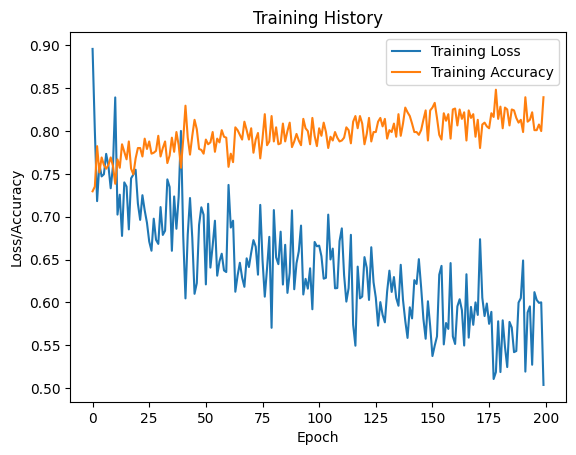

In [88]:
plt.plot(train_loss, label='Training Loss')
plt.plot(train_accuracy, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Training History')
plt.legend()
plt.show()